# Data Story: College Scorecard and Post-Graduate Success
by James Catterall

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

&emsp;This capstone project is investigating post-collegiate outcomes for students based on data from the US Department of Education's College Scorecard on the colleges they went to. For the Data Story portion of the project, we will specifically be focusing on monthly faculty salary, a variable that did not come to mind at first when considering the qualities of a "good" college. Some of the questions that we will be asking include:
* How does faculty salary differ between different types of colleges?
* At which colleges are faculty paid the most? Where are faculty paid the least?
* Does the amount that faculty get paid have an impact on the outcomes of students after graduation?

## Reading in the Data

In [141]:
cleaned=pd.read_csv('2014_cleaned.csv', dtype={'zip':'category'})
for column in [col for col in cleaned if 'bach' in col]:
    cleaned[column]=cleaned[column].astype('category')
for column in ['open_admissions_policy','zip','region_id','ownership','online_only','id']:
    cleaned[column]=cleaned[column].astype('category')

## Faculty Salary: Initial Exploration
&emsp;First, we make a histogram to get an idea for how the values for average monthly faculty salary are spread out across the dataset.

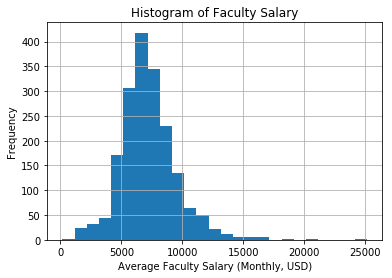

In [29]:
cleaned['faculty_salary'].hist(bins=25)
plt.xlabel("Average Faculty Salary (Monthly, USD)")
plt.ylabel('Frequency')
plt.title('Histogram of Faculty Salary')
plt.show()

&emsp;Based on the histogram, the median monthly salary for college faculty appears to be around \\$7,000. If we assume that college faculty work nine months full-time, then that would come out to a yearly salary of at least \\$63,000. The distribution of salaries is also very positively skewed, as there are a few outlying colleges with average monthly salaries between \\$17,500 and \\$25,000. On the other end, there are relatively few colleges where salaries are below \\$4,000, and almost none where salaries are below \\$1,000.

&emsp;Next, we will look at which colleges have the highest and lowest teacher pay. 

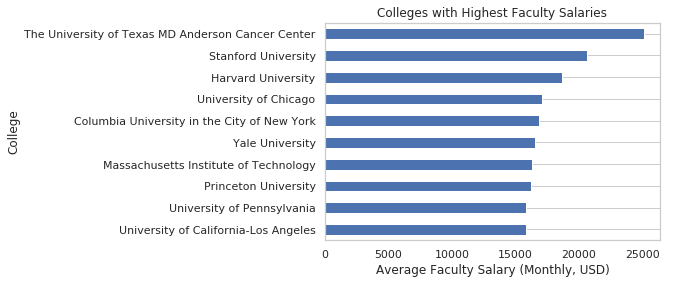

In [156]:
#what schools pay teachers the most?
cleaned[['name','faculty_salary']].sort_values(
    by="faculty_salary").tail(10).set_index('name').plot(
    kind='barh',legend=None)
plt.grid(axis='x')
plt.title('Colleges with Highest Faculty Salaries')
plt.xlabel('Average Faculty Salary (Monthly, USD)')
plt.ylabel('College')
plt.show()

&emsp;All of the schools listed here are large research universities with very significant graduate schools, so professors at these schools spend a lot of time either instructing high-level/research-based courses or conducting (and eventually publishing) peer-reviewed articles. In particular, faculty at The University of Texas MD Anderson Cancer Society had an average salary almost \\$5,000 higher than faculty at Stanford, which has the second-highest faculty salary. This is likely due to the university's specific focus on cancer prevention and treatment, which would be highly in demand.

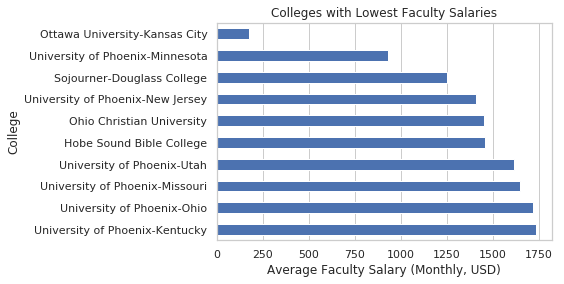

In [157]:
#what schools pay teachers the least?
cleaned[['name','faculty_salary']].sort_values(
    by="faculty_salary",ascending=False).tail(10).set_index('name').plot(
    kind='barh',legend=None)
plt.grid(axis='y')
plt.title('Colleges with Lowest Faculty Salaries')
plt.xlabel('Average Faculty Salary (Monthly, USD)')
plt.ylabel('College')
plt.show()

&emsp;Of the 10 colleges with the lowest faculty salaries, 6 of them are part of the University of Phoenix for-profit college chain, three of the schools are private Christian colleges, and one of the schools (Sojourner-Douglass College) had its accreditation revoked in 2015 and no longer exists. As indicated by the histogram, only two schools pay their faculty less than \\$1,000 a month, with the salary at the lowest-paying school being around \\$200 and over four times lower than the second-lowest school. 

&emsp;Finally, we look at how teacher pay differs across different types of institutions.

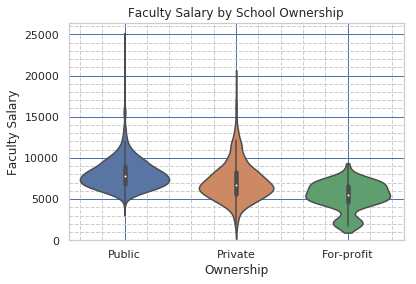

In [92]:
# How much are teachers paid? What kind of school is more profitable to work at?
sns.set(style="whitegrid")
ax = sns.violinplot(x="ownership", y='faculty_salary', data=cleaned,cut=0)
# cleaned.boxplot(column='faculty_salary', by='ownership',patch_artist=True)
plt.xticks(np.arange(start=0,stop=3), ('Public', 'Private', 'For-profit'))
plt.ylabel('Faculty Salary')
# plt.suptitle('')
plt.title('Faculty Salary by School Ownership')
plt.xlabel('Ownership')
plt.minorticks_on()
plt.grid(b=True, which='major', color='b',linestyle='-')
plt.ylim(ymin=0)
plt.grid(b=True, which='minor', linestyle='--')
plt.show()
# cleaned[cleaned['ownership']==2]['faculty_salary'].median()

&emsp;On average, publicly-owned colleges pay their faculty the most, with a median salary slightly above \\$7,500. Private schools pay their staff the second most, with a median salary slightly below \\$7,000. For-profit colleges pay the least on average - their median salary is around \\$5,500. This matches with how the colleges with the lowest salaries in the previous graph were mostly for-profit institutions. 

&emsp;Now that we have an understanding of what faculty salary is like at different institutions, we will now take a look at how it relates to other variables in our dataset - specifically, completion rate and mean earnings. 

## Faculty Salary and Student Success
&emsp;We will be focusing on how faculty salary correlates with the two variables that were initially picked as the dependent variables for this project: the 1-year debt repayment rate and the mean earnings of students 6 years after they enter the labor market.
### Repayment Rate
&emsp;In the first scatterplot, "repayment rate" refers to the percentage of students who have repaid at least part of their debt one year after leaving school and are not in default.

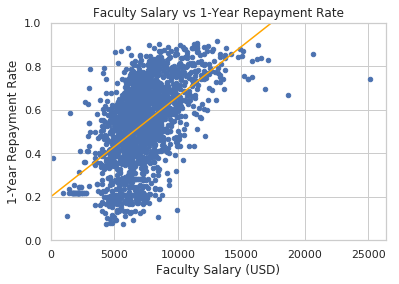

In [158]:
# Is there a correlation between faculty salary and completion rate?
cleaned.plot(kind='scatter', x='faculty_salary', y='1_yr_repay.overall_rate')
plt.xlabel('Faculty Salary (USD)')
plt.ylabel('1-Year Repayment Rate')
plt.title('Faculty Salary vs 1-Year Repayment Rate')
a, b = np.polyfit(cleaned['faculty_salary'],cleaned['1_yr_repay.overall_rate'],1)
x_theor = np.array([0, max(cleaned['faculty_salary'])])
y_theor= a*x_theor+b
plt.plot(x_theor,y_theor,color='orange')
plt.grid(True)
plt.ylim(ymin=0,ymax=1)
plt.xlim(xmin=0)
plt.show()


&emsp;There seems to be a moderate correlation between a school's faculty salary and the debt repayment rate of its students. For students from most schools where faculty earn \\$5,000 a month or less, the 1-year debt repayment rate is generally not above 0.6. In contrast, students from most schools with faculty salaries above \\$10,000 have repayment rates of at least 0.6. However, the regression line appears to be affected by the presence of a few serious outliers in the dataset (with The University of Texas MD Anderson Cancer Center, Stanford, and Harvard being the most noticable). Since the colleges with faculty salary between \\$5,000 and \\$10,000 have such a wide range of repayment rates on the scatterplot, that variable alone probably isn't the only factor determining students' ability to pay off their loans. 

### Mean Earnings (6 Years After Entry)
&emsp;The other correlation that had caught my eye during my data wrangling was the one between faculty salary vs mean earnings 6 years after entering the labor force.

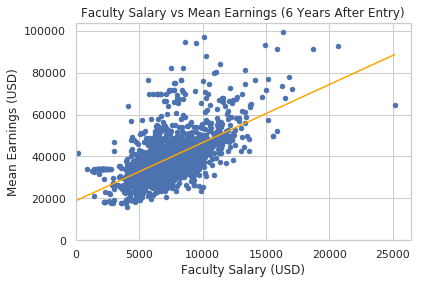

In [159]:
# Is there really a correlation between faculty salary and post-grad earnings?
cleaned.plot(kind='scatter', x='faculty_salary', y='6_yrs_AE.WNE.mean_earnings')
plt.xlabel('Faculty Salary (USD)')
plt.ylabel('Mean Earnings (USD)')
plt.title('Faculty Salary vs Mean Earnings (6 Years After Entry)')
a, b = np.polyfit(cleaned['faculty_salary'],cleaned['6_yrs_AE.WNE.mean_earnings'],1)
x_theor = np.array([0, max(cleaned['faculty_salary'])])
y_theor= a*x_theor+b
plt.plot(x_theor,y_theor,color='orange')
plt.grid(True)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()


&emsp;Compared with the previous graph, the scatterplot for faculty salary and mean earnings shows a stronger correlation and less variability around the regression line, especially between \\$0 and \\$15,000 on the x-axis. For both graphs, a possible explanation could be that teachers who receive higher salaries provide a better education to their students, and those students get better-paying jobs and are more able to pay off their student loan debt than students who went to colleges where faculty wasn't paid as much. Further investigation might be useful to determine whether the cause of this correlation is an actual link between how much teachers are paid and how much their students earn, or a confounding variable which influences both variables.

## Conclusion and Potential Hypotheses

&emsp;To recap on what has been covered, average faculty salary varies greatly between different institutions, with the largest research institutions having monthly salaries \\$15,000 and above, and many for-profit chain colleges having monthly salaries less than \\$2,000. However, the median value for average faculty salary appears to be around \\$7,000 per month. When broken down by school ownership, public colleges tend to pay staff more than private colleges, and nonprofit colleges in general have higher pay than for-profit colleges. Generally, colleges paying their teachers higher salaries correlated strongly with measures of student success; particularly with their mean earnings after leaving school and less markedly with their ability to pay off their student loans. Further research would be necessary to determine whether the correlations are indicative of an actual causal relationship between teacher pay and student success, or whether there is a confounding variable affecting the variables in question.